$$
P(y, mu) = 1/\sqrt{2\pi} * exp(-1/2*(y-\mu)^2)\\ \hspace{1.5cm} = 1/\sqrt{2\pi}*exp(-1/2*y^{2}) * exp(\mu*y-1/2*\mu^{2}) - Eq3\\
b(y) = 1/\sqrt{2\pi}*exp(-1/2*y^{2})\\ \eta = \mu\\ T(y) = y\\ a(\eta) = 1/2*\eta^2\\      
\eta = log(\phi/1-\phi)\\
\phi = 1/1+e^{-\eta} - Eq 3\\
b(y) = 1\\ T(y) = y\\ a(\eta) = -log(1-\phi)\\
$$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

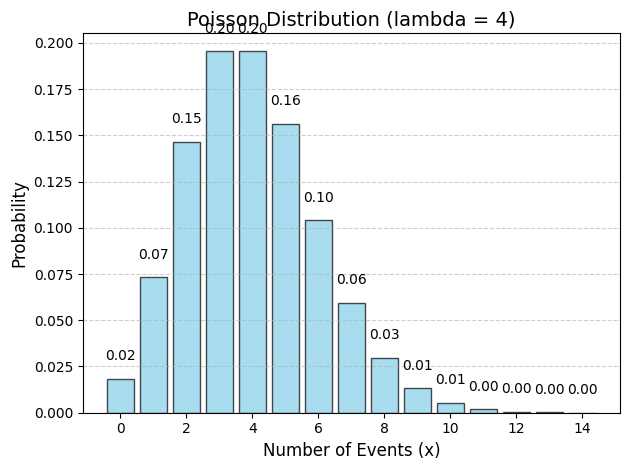

In [6]:
# Define the lambda parameter (rate of occurrences)
lambda_param = 4

# Generate a range of x values (number of events)
x = np.arange(0, 15, 1)

# Calculate the probability mass function (PMF) for the Poisson distribution
pmf_values = poisson.pmf(x, mu=lambda_param)

# Plot the Poisson distribution
plt.bar(x, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Poisson Distribution (lambda = {lambda_param})', fontsize=14)
plt.xlabel('Number of Events (x)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate the PMF values on top of each bar
for i, value in enumerate(pmf_values):
    plt.text(x[i], value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

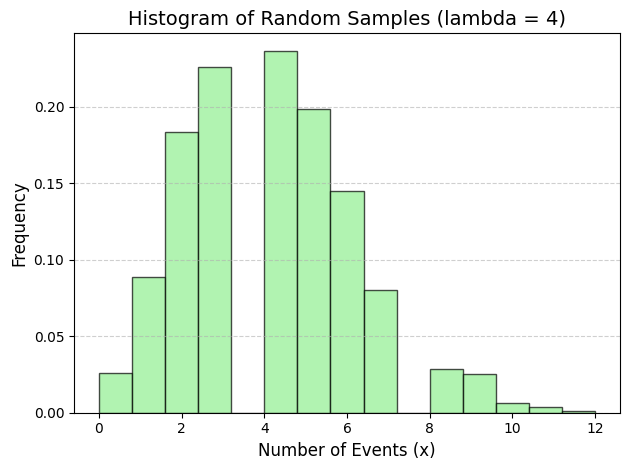

In [7]:
# Generate random samples from the Poisson distribution
random_samples = poisson.rvs(mu=lambda_param, size=1000)

# Visualize the histogram of the random samples
plt.hist(random_samples, bins=15, color='lightgreen', edgecolor='black', alpha=0.7, density=True)
plt.title(f'Histogram of Random Samples (lambda = {lambda_param})', fontsize=14)
plt.xlabel('Number of Events (x)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


(array([11., 27., 23., 13., 11.,  3.,  7.,  4.,  0.,  1.]),
 array([0.5732443 , 1.35066184, 2.12807938, 2.90549692, 3.68291446,
        4.460332  , 5.23774955, 6.01516709, 6.79258463, 7.57000217,
        8.34741971]),
 <BarContainer object of 10 artists>)

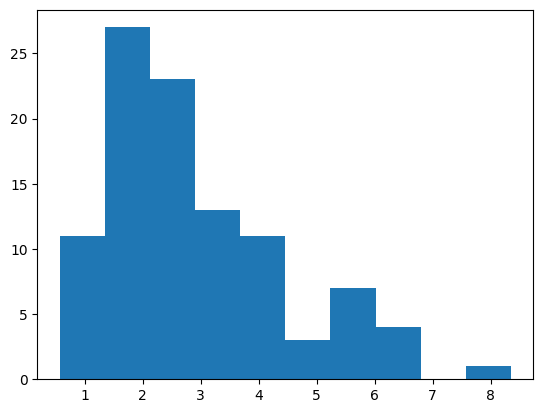

In [20]:
plt.hist(mu)

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
n_samples = 100

# Independent variables (features)
X = np.random.normal(0, 1, (n_samples, 2))
X = sm.add_constant(X)  # Add an intercept column

# Coefficients
beta = np.array([1.0, 0.5, -0.3])

# Linear predictor (eta)
eta = np.dot(X, beta)

# Link function (Poisson uses exponential)
mu = np.exp(eta)

# Response variable (dependent variable, count data)
y = np.random.poisson(mu)

# Create a DataFrame for visualization
data = pd.DataFrame(X, columns=["Intercept", "X1", "X2"])
data["y"] = y

# Fit a Generalized Linear Model (Poisson family)
model = sm.GLM(data["y"], data[["Intercept", "X1", "X2"]], family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Visualize observed vs. predicted values
predicted = results.fittedvalues

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.01
Date:                Sat, 18 Jan 2025   Deviance:                       117.82
Time:                        14:17:44   Pearson chi2:                     108.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4763
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9881      0.063     15.637      0.0

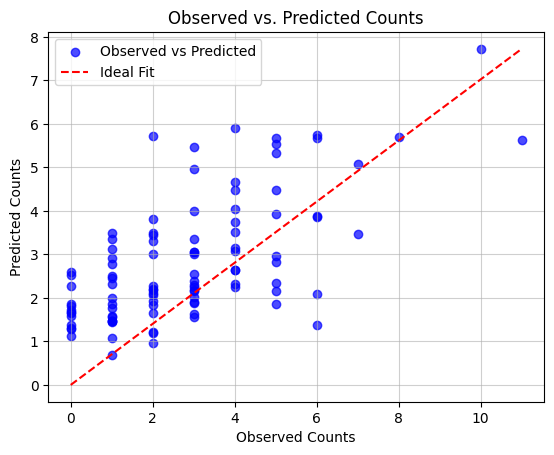

In [26]:
plt.scatter(data["y"], predicted, alpha=0.7, color='blue', label="Observed vs Predicted")
plt.plot([0, max(data["y"])], [0, max(predicted)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Observed Counts")
plt.ylabel("Predicted Counts")
plt.title("Observed vs. Predicted Counts")
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()